In [1]:
import sqlite3
import numpy as np
import comet_ml
# load the database pathxcon
from config import settings
from pathlib import Path

settings_proc ='SETTINGS1'
settings_simu = 'SETTINGS1'
root= Path(settings.data.path["processed"])
database_path = (root /settings_simu/settings_simu.lower()).with_suffix('.db')

In [2]:
database_path

PosixPath('/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/data/processed/SETTINGS1/settings1.db')

In [3]:
from psm.utils.data.metadata import get_metadata_processed
metadata= get_metadata_processed(settings_proc, settings_simu)
freq_axis = metadata['freq']

In [4]:
from psm.models.prepare_data import CreateTransformer,PSDDataModule,PSDDataset
# let's create the transformer
transformer = CreateTransformer(database_path, freq=freq_axis, freq_min=0, freq_max=150)
transform_psd = transformer.transform_psd
transform_label = transformer.transform_label
input_dim = transformer.dimension_psd()
dm = PSDDataModule(database_path, transform_psd, transform_label, batch_size=32)
dm.setup()

# Create dataloaders
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()
test_dl = dm.test_dataloader()

# Print some details
print(f"Number of training samples: {len(dm.train_dataset)}")
print(f"Number of validation samples: {len(dm.val_dataset)}")
print(f"Number of test samples: {len(dm.test_dataset)}")

# Get a batch of data
for batch in train_dl:
    data, label = batch
    print(f"Shape of data from train_dl: {data.shape}")
    print(f"Shape of label from train_dl: {label.shape}")
    break

(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')
Number of training samples: 16000
Number of validation samples: 4000
Number of test samples: 4000
Shape of data from train_dl: torch.Size([32, 385])
Shape of label from train_dl: torch.Size([32])


In [5]:
from psm.models.prepare_data import PSDNotchDataset , PSDNotchDatasetOriginal
database_notch_path = (root/settings_simu/(settings_proc.lower()+"_vas")).with_suffix('.db')
anomaly_dl = PSDDataset(database_path, transform=transform_psd, transform_label=transform_label, stage='anomaly')
test_dl = PSDDataset(database_path, transform=transform_psd, transform_label=transform_label, stage='test')


psd_notch = PSDNotchDataset(database_notch_path, transform=transform_psd, transform_label=transform_label)
psd_original = PSDNotchDatasetOriginal(database_notch_path,transform=transform_psd, transform_label=transform_label)


stage=? ('anomaly',)
stage=? ('test',)
system_name LIKE ? ('%',)
system_name LIKE ? ('%',)


In [6]:
%load_ext autoreload
%autoreload 2

CometLogger will be initialized in online mode
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: You are trying to log string value as a metric. This is not recommended.
COMET INFO: Experiment is live on comet.com https://www.comet.com/yacinebelhadj/psm-mdof1/abe18518b9bd4a8699c4b0538fe5b3b8



(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')


/home/yacine/.local/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:617: UserWarning: Checkpoint directory /home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/model/model exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name      | Type                        | Params
----------------------------------------------------------
0 | model     | EnergyDenseSignalClassifier | 201 K 
1 | criterion | CrossEntropyLoss            | 0     
2 | train_acc | MulticlassAccuracy          | 0     
3 | val_acc   | MulticlassAccuracy          | 0     
4 | test_acc  | MulticlassAccuracy          | 0     
----------------------------------------------------------
201 K     Trainable params
0         Non-trainable params
201 K     Total params
0.807     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/yacine/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


validation acc: 0.0


/home/yacine/.local/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:42: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028
/home/yacine/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/yacine/.local/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:42: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

validation acc: 0.0


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


validation acc: 0.0


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yacinebelhadj/psm-mdof1/abe18518b9bd4a8699c4b0538fe5b3b8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [500]             : (3.0299928188323975, 3.5806593894958496)
COMET INFO:     lr-Adam                : 0.002
COMET INFO:     train_acc [10]         : (0.04631249979138374, 0.05143750086426735)
COMET INFO:     train_energy_loss [10] : (2.995795965194702, 2.9987428188323975)
COMET INFO:     train_loss [10]        : (3.030449151992798, 3.1025192737579346)
COMET INFO:     val_acc [10]           : (0.045249998569488525, 0.05350000038743019)
COMET INFO:     val_energy_loss [10]   : (2.995755434036255, 2.99661278724670

(anomaly_level=?) AND stage=? (0, 'train')
(anomaly_level=?) AND stage=? (0, 'test')


/home/yacine/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

torch.Size([4000]) torch.Size([4000])


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.05000000074505806    │
│     test_energy_loss      │     2.995870351791382     │
│         test_loss         │    3.0304083824157715     │
└───────────────────────────┴───────────────────────────┘

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yacinebelhadj/psm-mdof1/abe18518b9bd4a8699c4b0538fe5b3b8
COMET INFO:   Metrics:
COMET INFO:     test_acc         : 0.05000000074505806
COMET INFO:     test_energy_loss : 2.995870351791382
COMET INFO:     test_loss        : 3.0304083824157715
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:   Parameters:
COMET INFO:     batch_norm   : True
COMET INFO:     bias         : True
COMET INFO:     dense_layers : [248, 248, 128, 64, 32]
COMET INFO:     dropout_rate : 0
COMET INFO:     en_coef      : 0.01
COMET INFO:     input_dim    : 385
COMET INFO:     l1_reg       : 0.0001
COMET INFO:     lr  

logging metrics--


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yacinebelhadj/psm-mdof1/abe18518b9bd4a8699c4b0538fe5b3b8
COMET INFO:   Metrics:
COMET INFO:     mean_AUC_0.03         : 0.5
COMET INFO:     mean_VAS_gm           : 0.0
COMET INFO:     mean_VAS_hm           : 0.5017985611510791
COMET INFO:     mean_VAS_m            : 0.4982078853046595
COMET INFO:     mean_weighted_auc_VAS : 0.5000000000000001
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:   Uploads:
COMET INFO:     asset         : 2 (2.35 MB)
COMET INFO:     figures       : 20
COMET INFO:     html          : 1
COMET INFO:     model-element : 1 (2.35 MB)
COMET INFO: 


finished logging metrics--


COMET INFO: Uploading 1 metrics, params and output messages


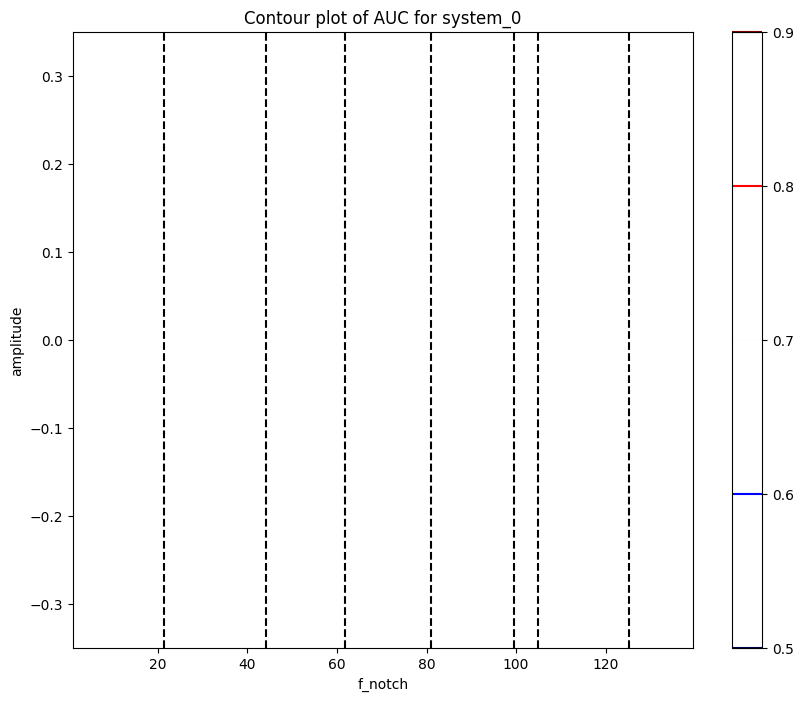

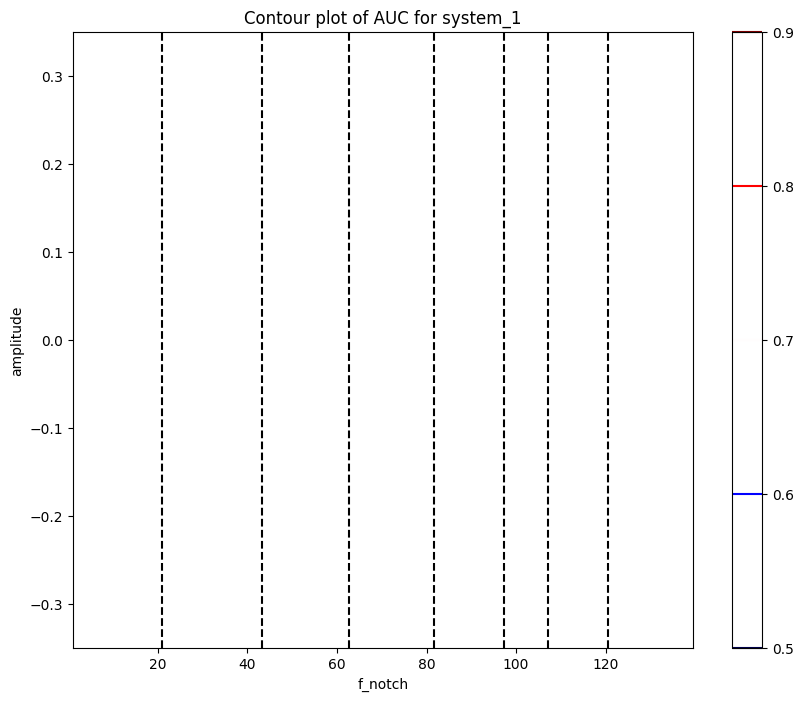

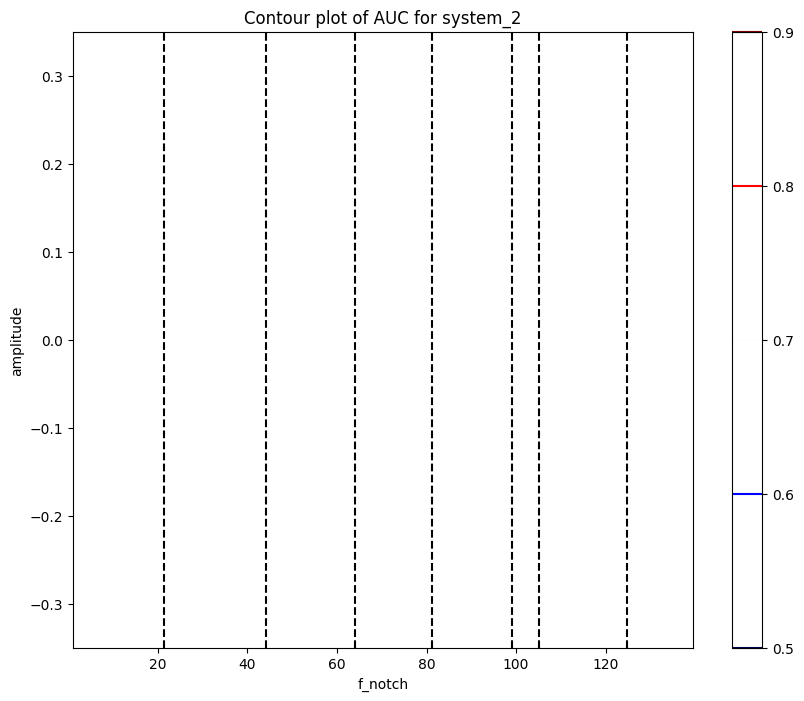

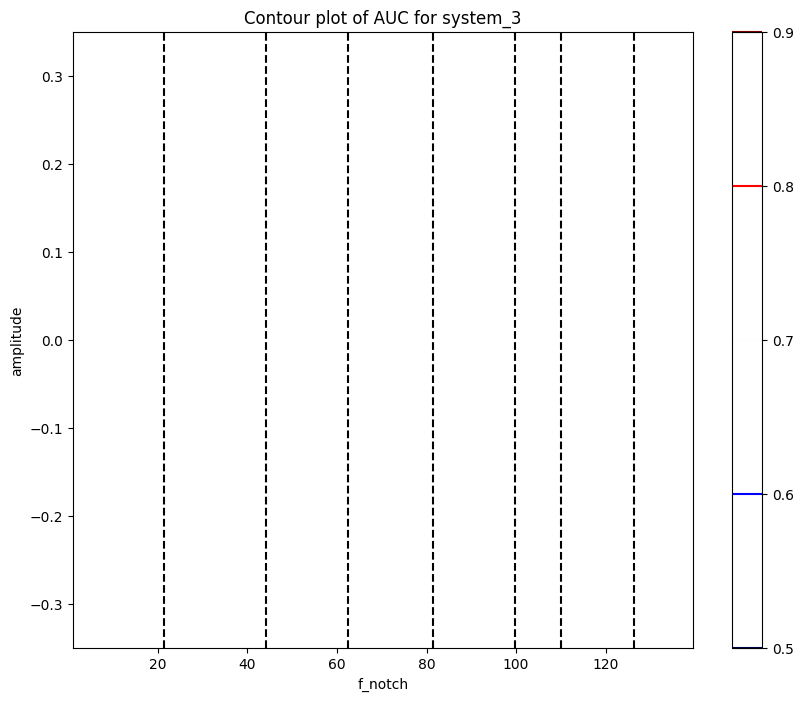

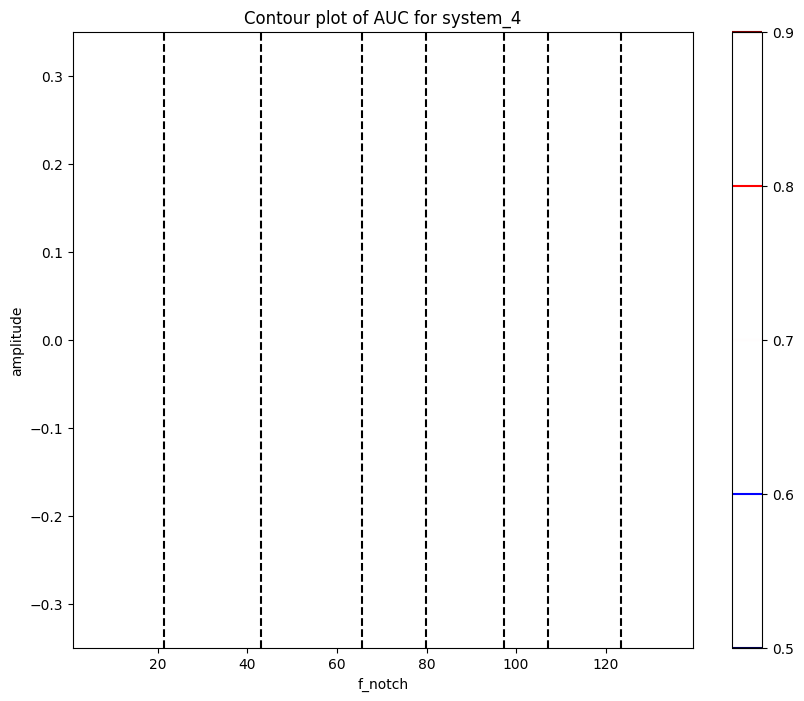

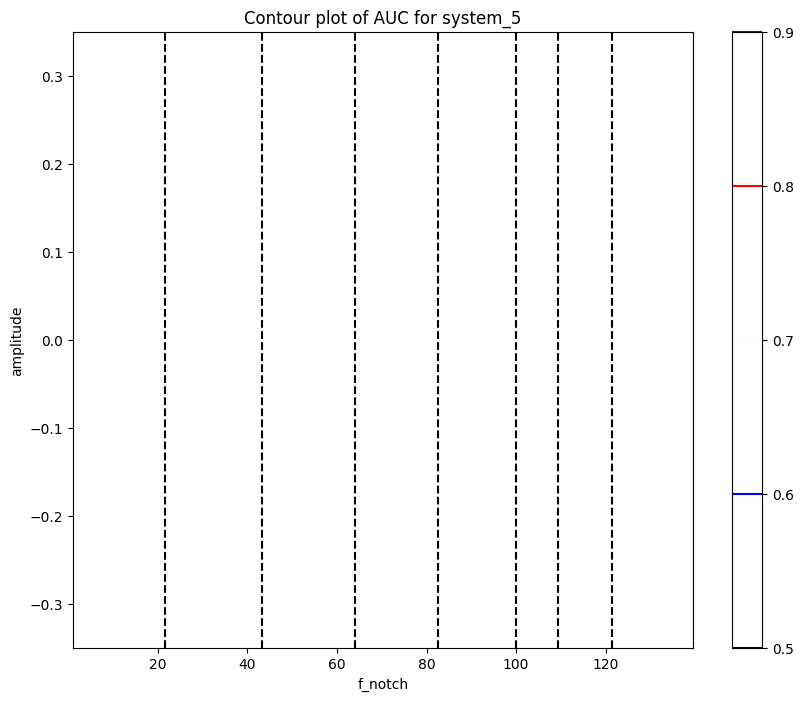

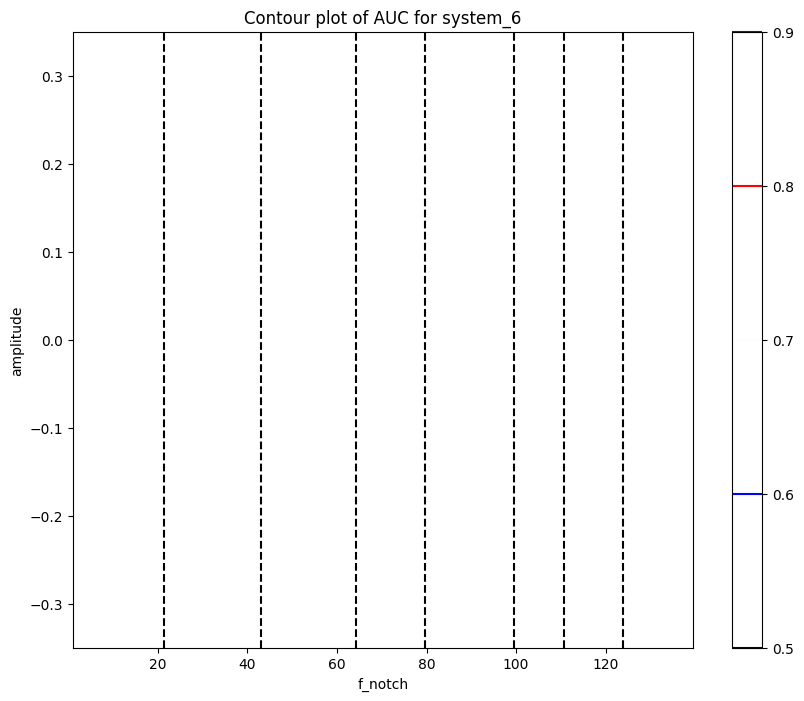

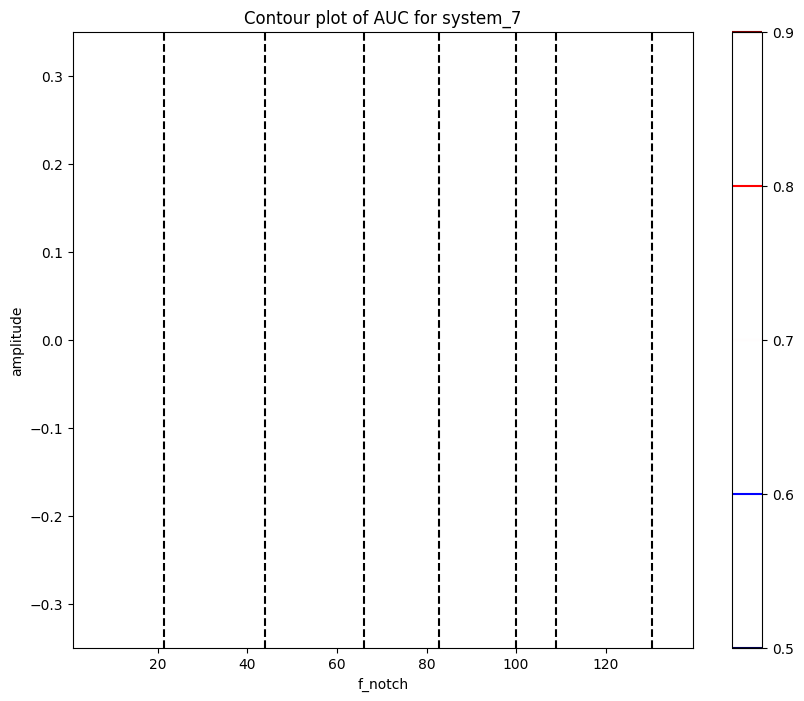

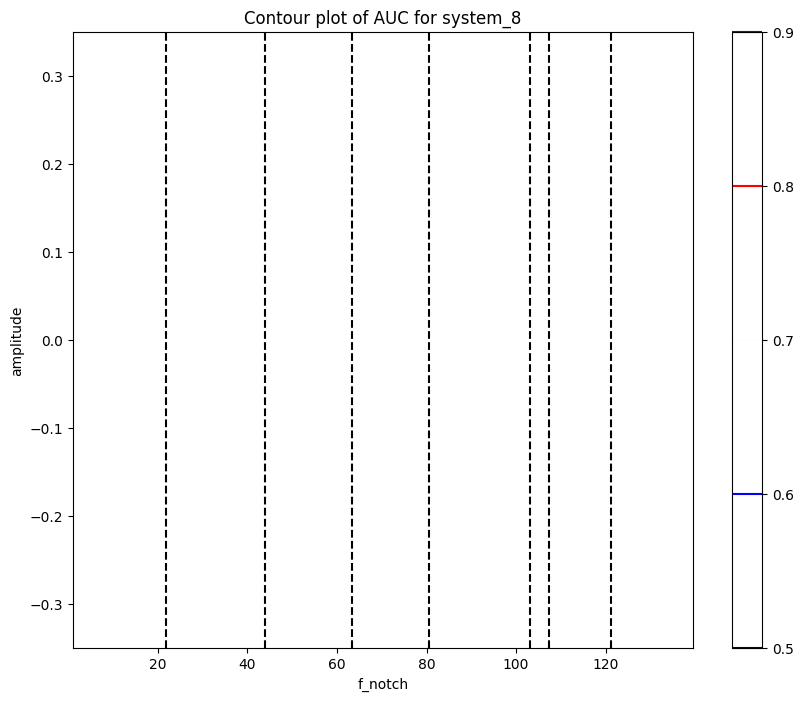

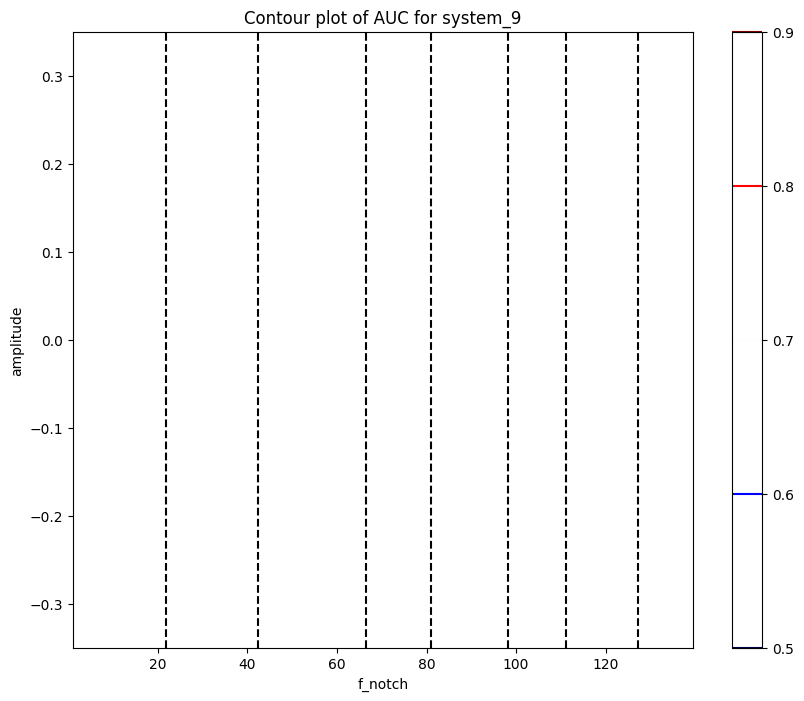

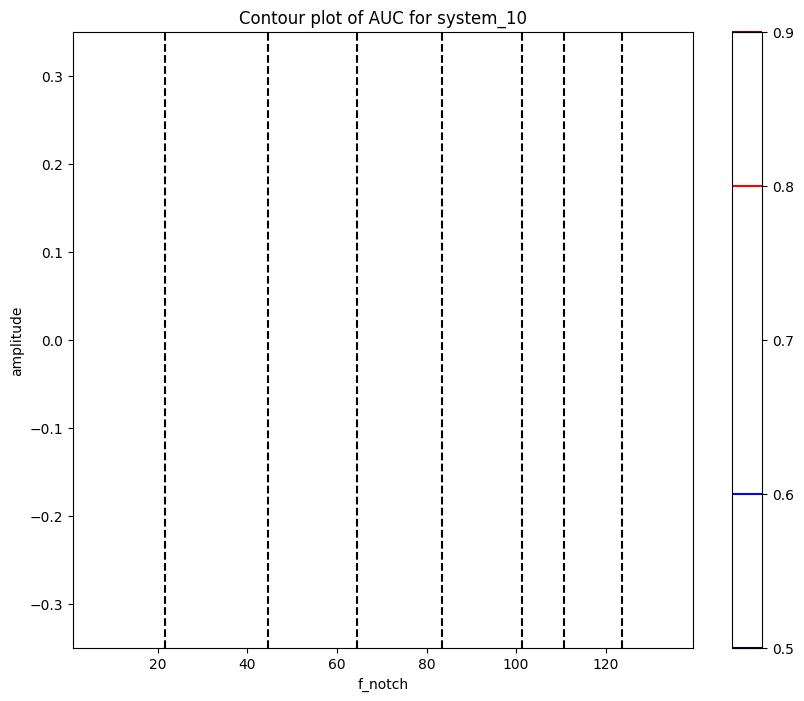

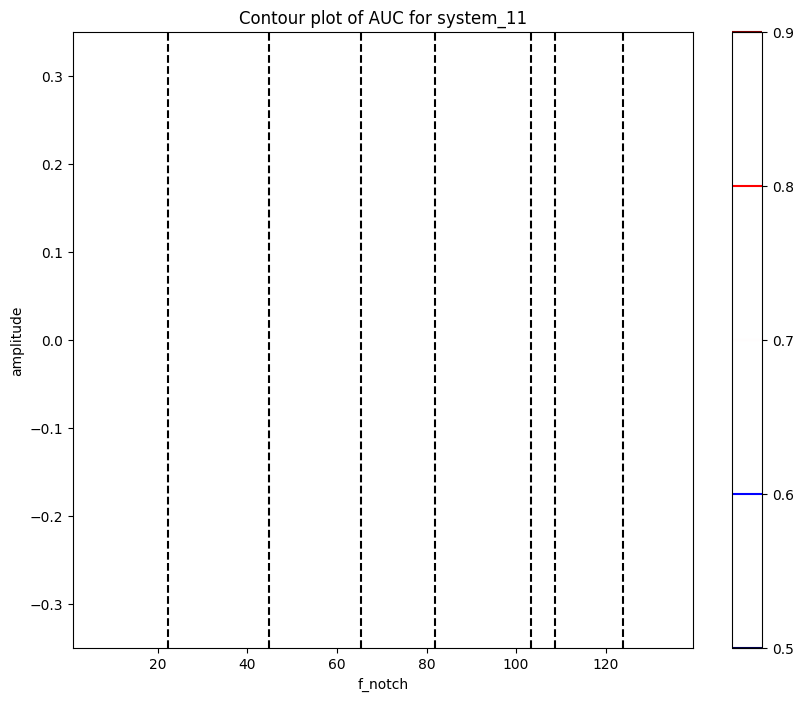

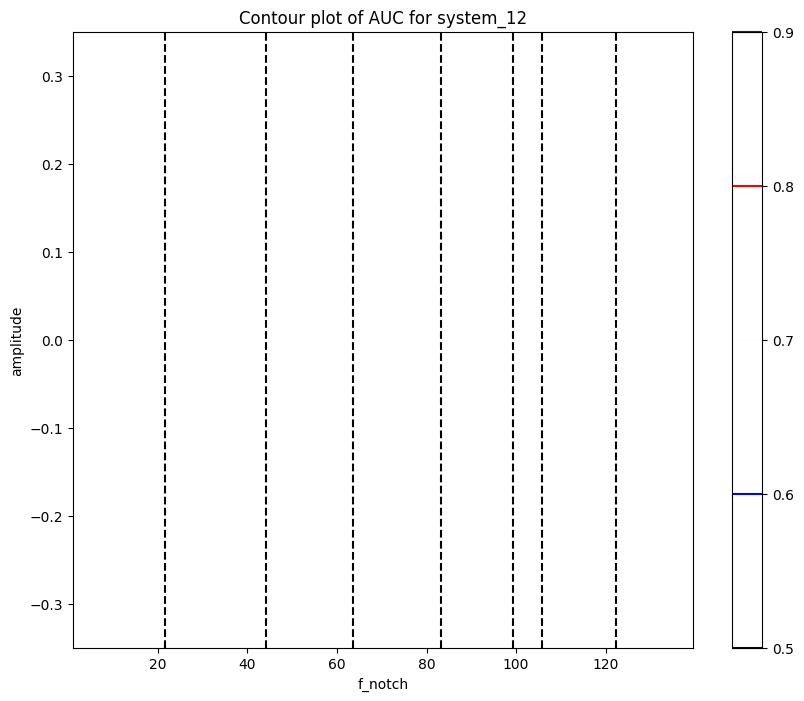

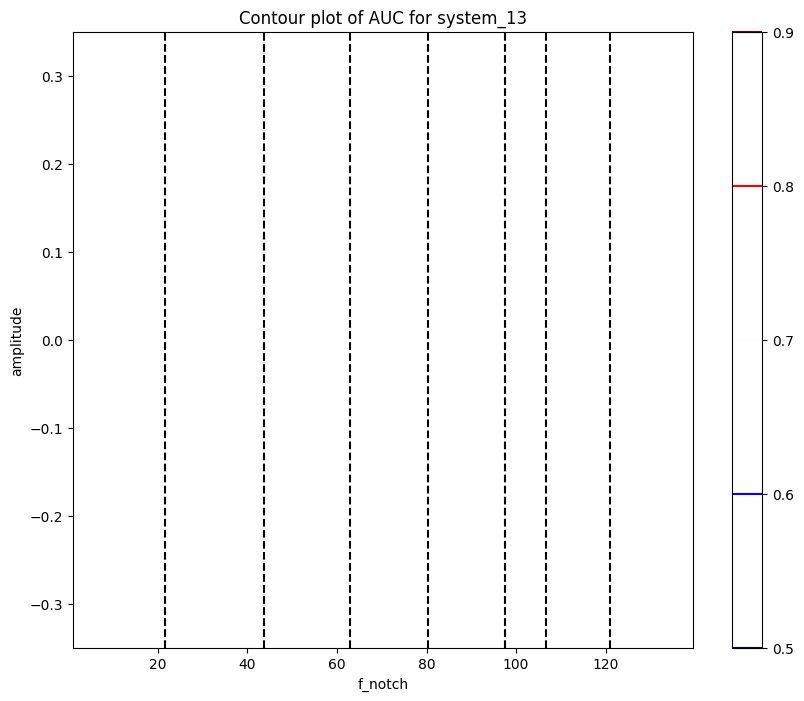

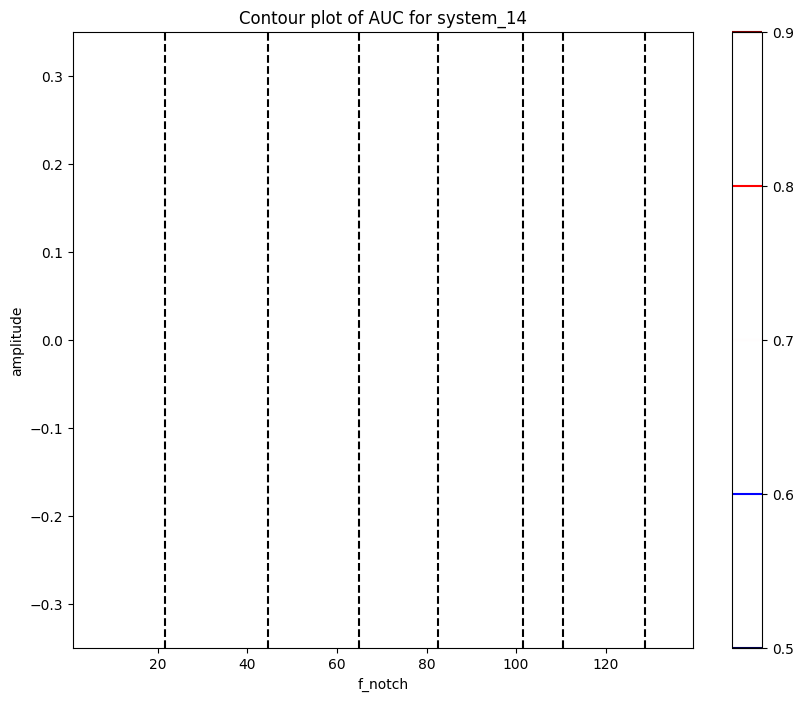

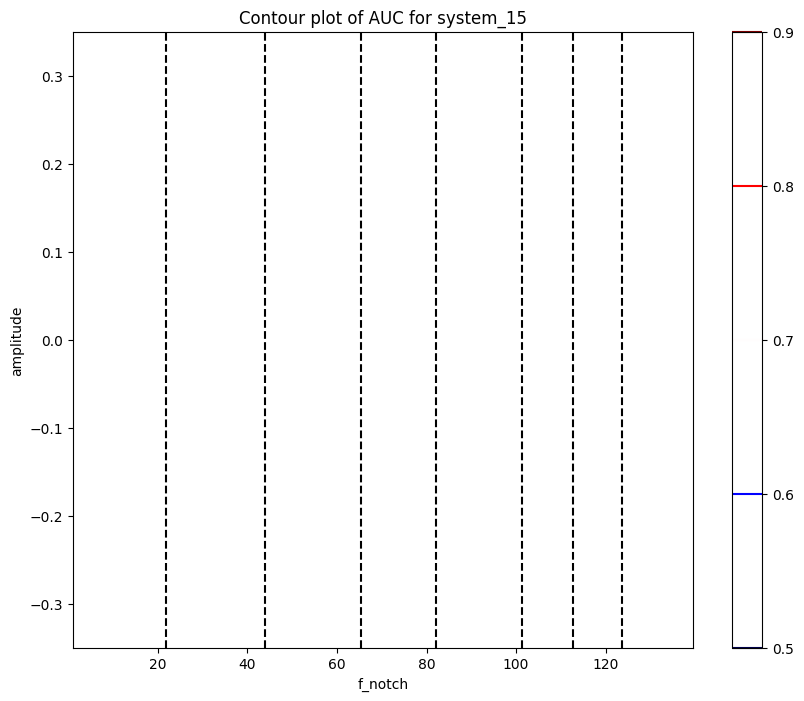

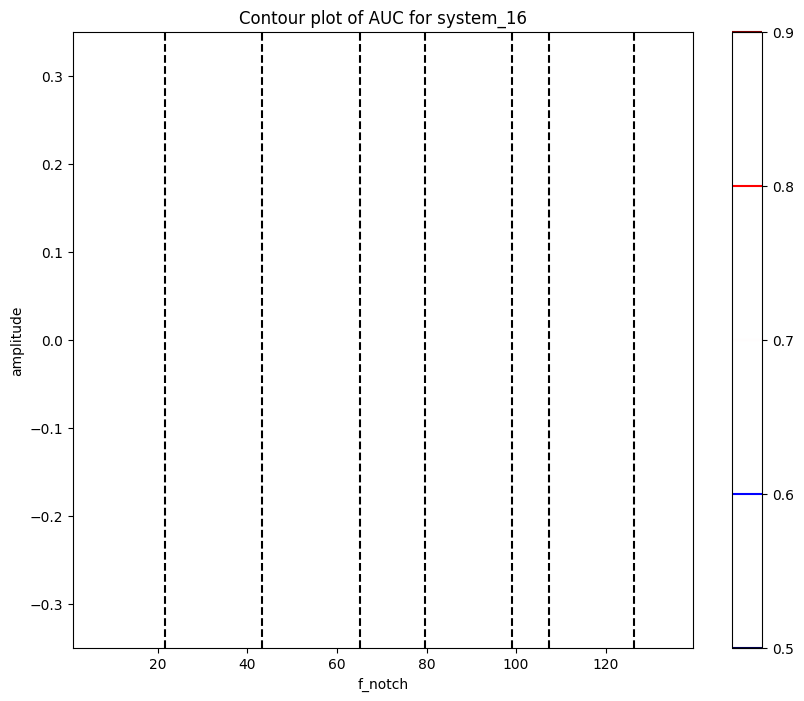

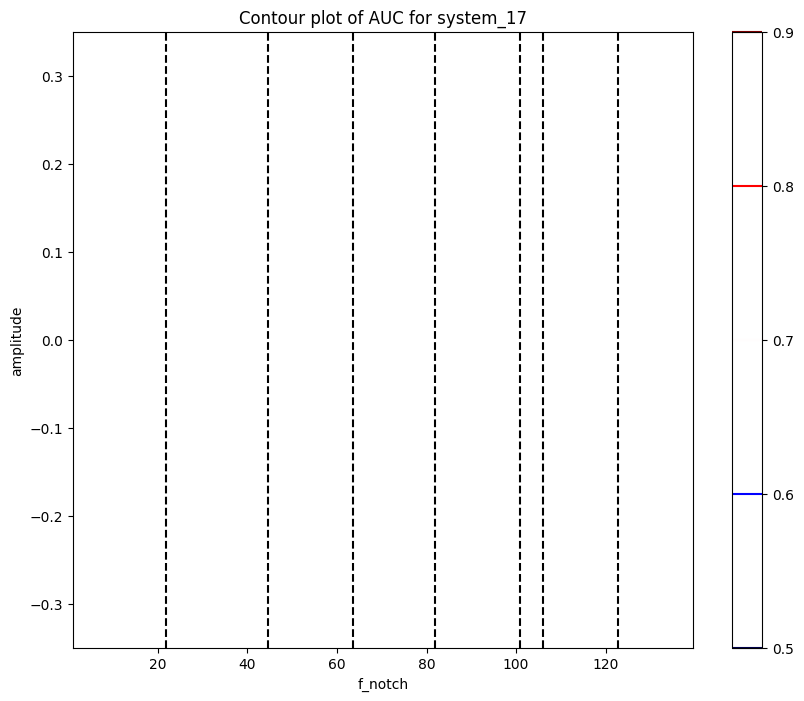

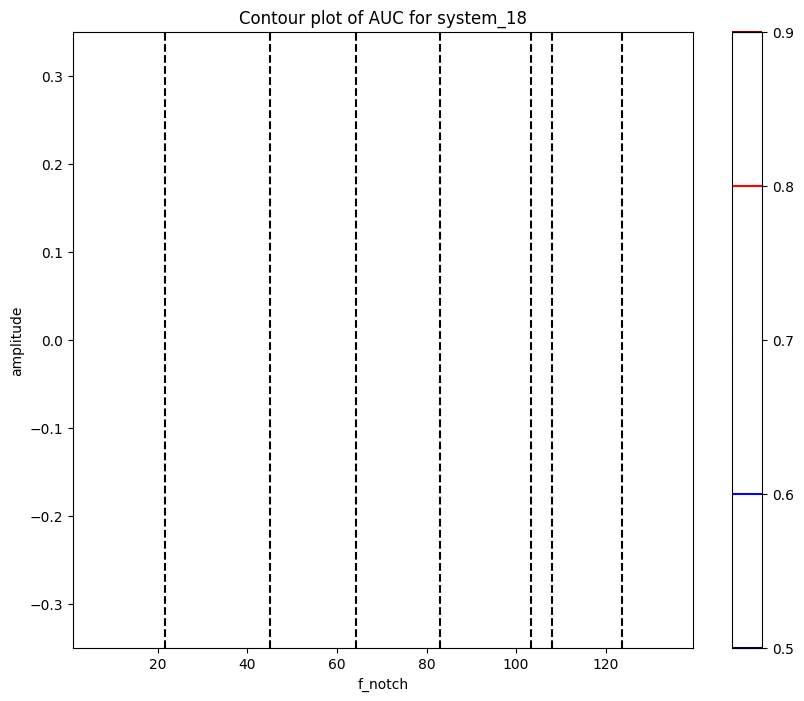

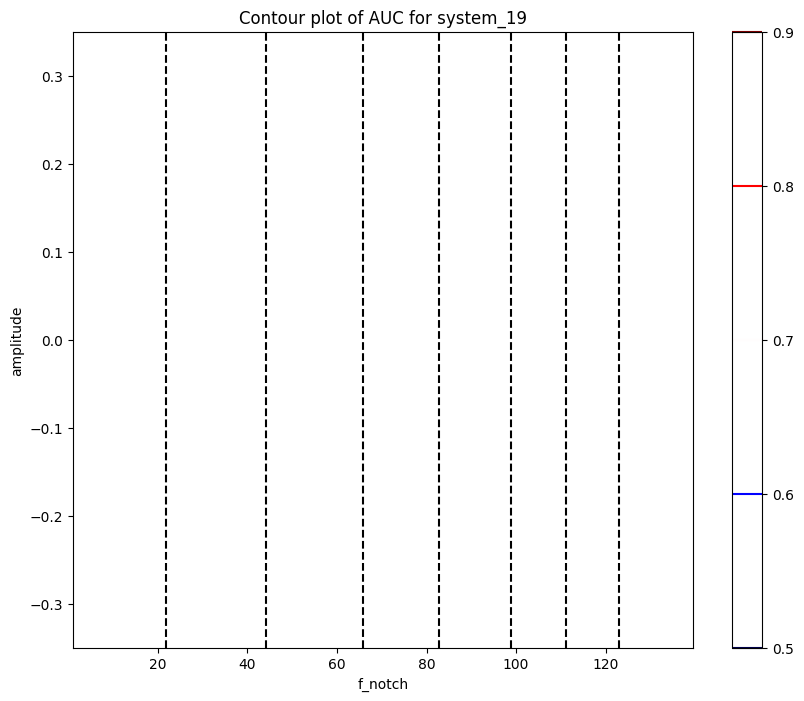

In [7]:
from psm.models.callbacks_logger import log_metrics 
from psm.models.energy_classification import EnergyDenseSignalClassifierModule 
from psm.models.callbacks_logger import create_callbacks_loggers
from pytorch_lightning import Trainer
from psm.models.ad_systems import AD_energy
from psm.eval.benchmark import Benchmark_SA, Benchmark_VAS
from torch import nn

# create logger and callbacks
callbacks, logger = create_callbacks_loggers()
# hyperparameters
hyper_params = {'input_dim':input_dim, 'dense_layers':[248,248,128, 64, 32],
                'dropout_rate':0, 'num_classes':20, 'lr':0.002,
                'batch_norm':True, 'activation':nn.ReLU(), 'l1_reg':1e-4}
# create model
model = EnergyDenseSignalClassifierModule(**hyper_params)

trainer = Trainer(max_epochs=10, callbacks=callbacks, logger=logger)
trainer.fit(model, dm)

checkpoint_path = trainer.checkpoint_callback.best_model_path
best_model = EnergyDenseSignalClassifierModule.load_from_checkpoint(checkpoint_path)


trainer.test(best_model, dm)
ad_system = AD_energy(model=best_model.model)
ad_system.fit(train_dl)
#ad_system.log_model(logger.experiment)
logger.experiment.log_model("best_model", checkpoint_path)
logger.experiment.log_asset(checkpoint_path,step=trainer.global_step)


# first benchmark
benchmark1= Benchmark_SA(ad_system,anomaly_dl, test_dl, batch_size=10000)
res1 = benchmark1.evaluate()
benchmark2= Benchmark_VAS(ad_system,psd_notch,psd_original,batch_size=10000)
res2 = benchmark2.evaluate_all_systems()
print('logging metrics--')
global_metric = log_metrics(logger,res1,res2)
print('finished logging metrics--')
# After training, you can also test your model

logger.experiment.end()

In [8]:
test_sample = next(iter(test_dl))
psd= test_sample[0]

In [9]:
ad_system.predict(psd)

array([2.9958687], dtype=float32)

In [10]:
model_nn = best_model.model
model_nn.eval()
res = model_nn(psd.reshape(1,-1))
model_nn.get_energy(psd.reshape(1,-1))

tensor([2.9959])